<a href="https://colab.research.google.com/github/1PD-IS-NO-1/mlproject/blob/main/car_evaluation_(predictive_Analysis)by_priyanshu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
col_names = ['buying price', 'maintenance cost', 'number of doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df=pd.read_csv('/content/car.data.csv',header=None,names=col_names)

In [ ]:
df.head(10)

,buying price,maintenance cost,number of doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [ ]:
df['buying price'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying price, dtype: int64

In [ ]:
df['maintenance cost'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maintenance cost, dtype: int64

# here we can use one hot encoder like this as you can see below but it giving some error so now i am creating dummy variable for categorical data

In [ ]:

'''df_encoded = pd.get_dummies(df, columns=['buying price', 'maintenance cost'])
category_mapping = {'low': 0, 'med': 1, 'high': 2,'vhigh':3}

df['buying price'] = df['buying price'].map(category_mapping)
df['maintenance cost'] = df['maintenance cost'].map(category_mapping)'''


"df_encoded = pd.get_dummies(df, columns=['buying price', 'maintenance cost'])\ncategory_mapping = {'low': 0, 'med': 1, 'high': 2,'vhigh':3}\n\ndf['buying price'] = df['buying price'].map(category_mapping)\ndf['maintenance cost'] = df['maintenance cost'].map(category_mapping)"

#  now we are going to change categorical data into numerical data

In [ ]:
df['buying price'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying price, dtype: int64

In [ ]:
df['maintenance cost'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maintenance cost, dtype: int64

In [ ]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
#df_encoded = pd.get_dummies(df, columns=['lug_boot', 'safety','class' ])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame with categorical columns
label_encoder = LabelEncoder()

'''df['buying price'] = label_encoder.fit_transform(df['buying price'])
df['maintenance cost'] = label_encoder.fit_transform(df['maintenance cost'])
df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])
df['safety'] = label_encoder.fit_transform(df['safety'])
df['class'] = label_encoder.fit_transform(df['class'])'''

"df['buying price'] = label_encoder.fit_transform(df['buying price'])\ndf['maintenance cost'] = label_encoder.fit_transform(df['maintenance cost'])\ndf['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])\ndf['safety'] = label_encoder.fit_transform(df['safety'])\ndf['class'] = label_encoder.fit_transform(df['class'])"

In [ ]:
df.head(10)

,buying price,maintenance cost,number of doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


# SO NOW YOU CAN SEE I CHANGE WHOLE CATEGORICAL DATA INTO NUMERICAL DATA BY THE HELP OF LABEL ENCODER (ONE HOT ENCODER)

In [ ]:
feature_names = list(df.columns.values[:-1])
for feature in feature_names:
    unique_count = df[feature].nunique()
    unique_vals = df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying price: 4 values, ['vhigh' 'high' 'med' 'low']
maintenance cost: 4 values, ['vhigh' 'high' 'med' 'low']
number of doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [ ]:
df_encoded = pd.get_dummies(df, columns=feature_names, drop_first=True)
df_encoded.tail()

,class,buying price_low,buying price_med,buying price_vhigh,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_3,number of doors_4,number of doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,good,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,vgood,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,unacc,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,good,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,vgood,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
df_encoded['class'], class_uniques = pd.factorize(df_encoded['class'])
df_encoded.tail()

,class,buying price_low,buying price_med,buying price_vhigh,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_3,number of doors_4,number of doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,3,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
df.shape

(1728, 7)

In [ ]:
class_col = df_encoded['class']

df_encoded.drop(columns=['class'], inplace=True)

last_col_pos = df_encoded.columns.get_loc('safety_med') + 1

df_encoded.insert(last_col_pos, 'class', class_col)
df_encoded.tail()

,buying price_low,buying price_med,buying price_vhigh,maintenance cost_low,maintenance cost_med,maintenance cost_vhigh,number of doors_3,number of doors_4,number of doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,3
1724,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,2
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1726,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,3
1727,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,2


In [ ]:
df.head()

,buying price,maintenance cost,number of doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.shape

(1728, 7)

In [ ]:
df.columns

Index(['buying price', 'maintenance cost', 'number of doors', 'persons',
       'lug_boot', 'safety', 'class'],
      dtype='object')

In [ ]:
X = df_encoded.loc[:, 'buying price_low':'safety_med']
# Labels.
y = df_encoded.loc[:, 'class']

In [ ]:
'''X = df.drop('buying price', axis=1)  # Features
y = df['buying price'] '''

"X = df.drop('buying price', axis=1)  # Features\ny = df['buying price'] "

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
X_train.shape

(1296, 15)

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 1 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 3 3
 0 0 0 0 0 1 1 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 2 0 1 1 0 0 0 0 0
 2 1 0 0 0 0 2 0 0 1 3 1 0 0 3 1 0 1 0 0 0 3 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 3 0 1 0 0 1 0 0 0 0 0 3 0 0 1 0 3 0 0 0 0 1 1 0 1 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 2 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 3 0 0 0 3 0 1 0 0 0 0 0 2 0 0 0 2 2 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 2 0 0 0 1 0 0 1 0 0 3 3 0 3 0 1 1 0 0 1 3 2 1 1 0 0 0 0 2
 1 1 0 0 0 0 2 0 0 1 0 1 0 0 2 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 2 0 0 0 0 1 0 1 1 0 0 1
 0 3 3 2 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 3 0 0 0 0 0 0 1 0
 0 2 0 1 0 0 1 1 0 2 0 1 0 3 0 1 1 0 0 0 0 1 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8958333333333334

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = class_uniques[y_pred]
y_test = class_uniques[y_test]

confusion_matrix(y_test, y_pred, labels=['unacc', 'acc', 'good', 'vgood'])

array([[290,   4,   0,   0],
       [ 14,  75,   7,   7],
       [  0,   6,   9,   0],
       [  0,   4,   3,  13]])

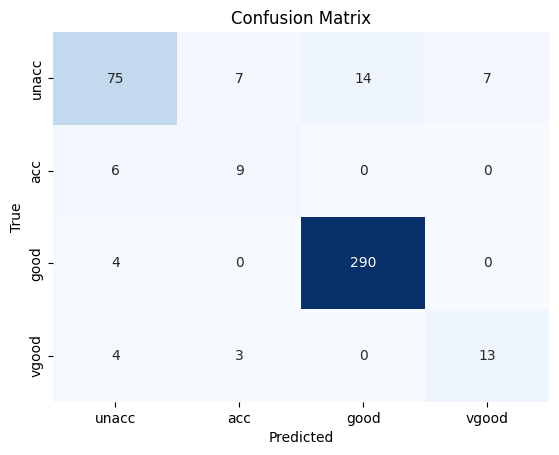

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['unacc', 'acc', 'good', 'vgood'],
            yticklabels=['unacc', 'acc', 'good', 'vgood'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# so here now we i am going to increase the accuracy of decision tree classifier by hyper parameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
print(best_params)

{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with specified parameters
clf = DecisionTreeClassifier(
    max_depth=None,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)

# Fit the model
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_features='auto', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8958333333333334

# so here you can see our accuracy increase but in this the difference is not much **approximatie**